In [41]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/VSCODE/ML/exemple/wine-clustering.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
# 결측값 확인
print(data.isnull().sum())

# 결측값 50%이상인 행 삭제
# 각 행의 결측값 비율 계산
row_missing_percentage = data.isnull().mean(axis=1) * 100

# 결측값 비율이 50% 이상인 행 삭제
rows_to_drop = row_missing_percentage[row_missing_percentage >= 50].index
data.drop(index=rows_to_drop, inplace=True)

# 변경된 데이터 확인
print(data.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


Top features correlated with SalePrice:
Alcohol            1.000000
Proline            0.643720
Color_Intensity    0.546364
Total_Phenols      0.289101
Magnesium          0.270798
Flavanoids         0.236815
Ash                0.211545
Proanthocyanins    0.136698
Malic_Acid         0.094397
OD280              0.072343
Name: Alcohol, dtype: float64


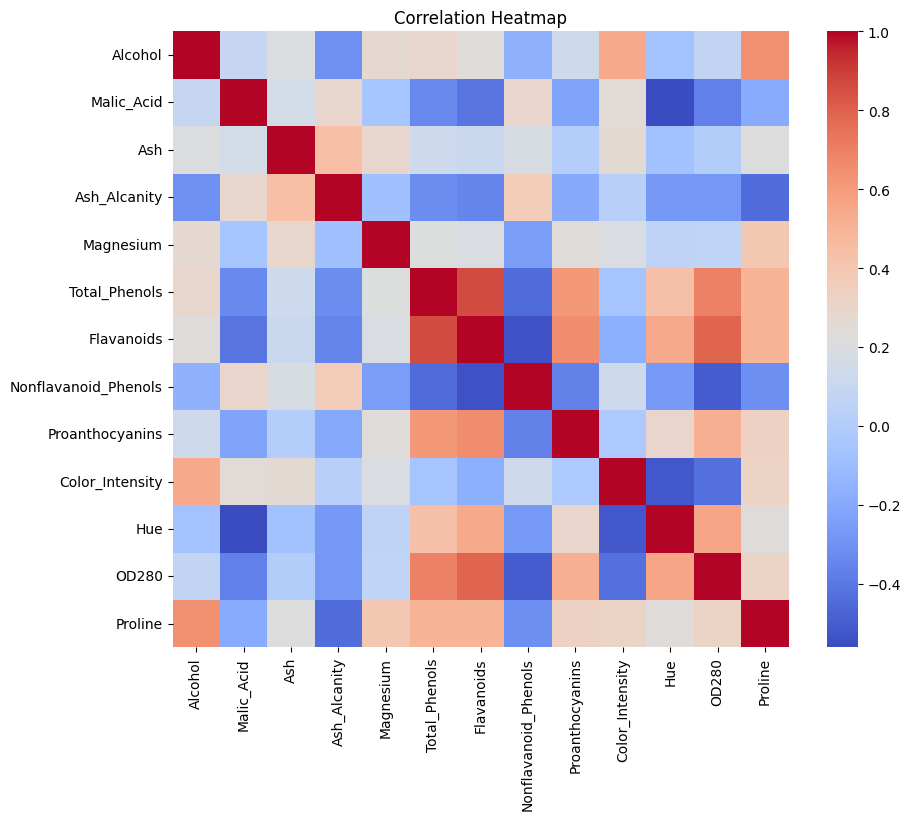

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# 수치형 변수만 선택
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# SalePrice와의 상관계수 계산
correlation_matrix = numeric_features.corr()
saleprice_corr = correlation_matrix['Alcohol'].sort_values(ascending=False)

# 상위 10개 특성 출력
print("Top features correlated with SalePrice:")
print(saleprice_corr.head(10))

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [44]:
# 3. 범주형 데이터 처리
label_encoder = LabelEncoder()
categorical_cols = ['Color_Intensity', 'Total_Phenols']  # 주요 범주형 열
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [45]:
# 4. 주요 특성 선택
selected_features = ['Proline', 'Color_Intensity', 'Total_Phenols', 'Alcohol']
data = data[selected_features]


In [ ]:
# 5. 스케일링
scaler = StandardScaler()
data[['Proline']] = scaler.fit_transform( data[['Proline']])

In [47]:

# 6. 데이터 분리
X = data.drop('Alcohol', axis=1)  # 특성
y = data['Alcohol']  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


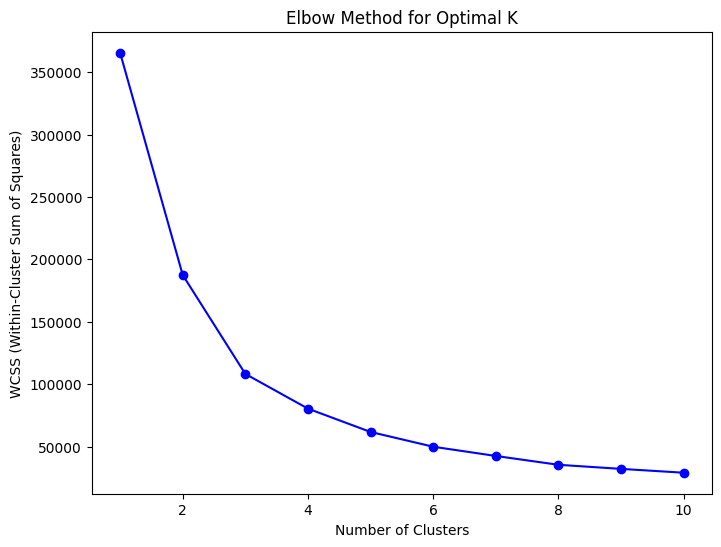

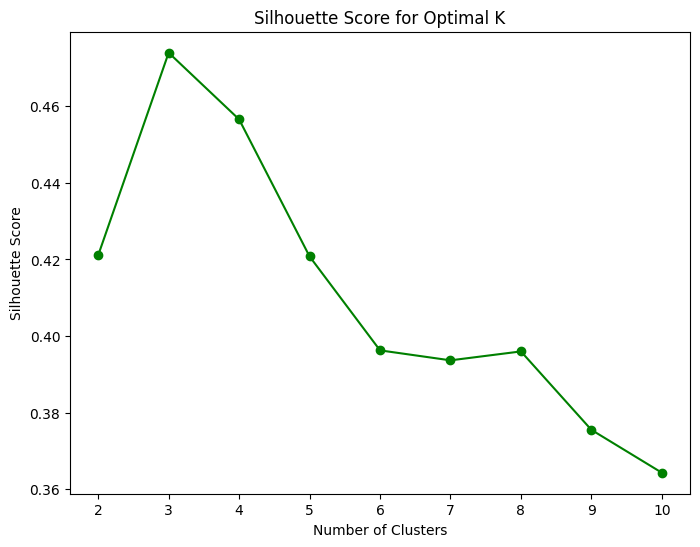

In [48]:
#엘보우
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method로 최적의 클러스터 수 찾기
wcss = []
for i in range(1, 11):  # 1부터 10까지의 클러스터 개수로 테스트
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_는 군집 내 제곱 오차의 합

# Elbow 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# 실루엣
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette Score를 사용하여 최적의 클러스터 수 찾기
sil_scores = []
for i in range(2, 11):  # 최소 2개 이상의 클러스터부터 시작
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

# Silhouette Score 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


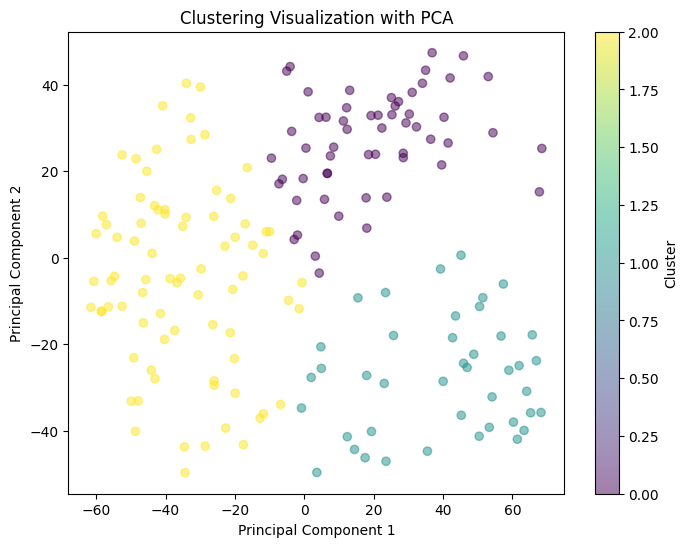

In [49]:
from sklearn.decomposition import PCA

# 최적의 군집 수로 k-Means 적용
optimal_clusters = 3  # 예를 들어, 엘보 방법이나 실루엣 점수를 통해 3으로 결정된 경우

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# PCA를 사용한 2D 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.5)
plt.title("Clustering Visualization with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


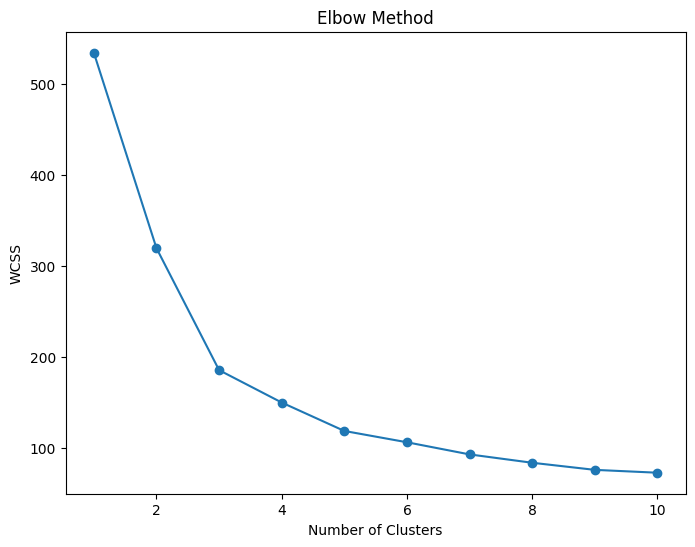

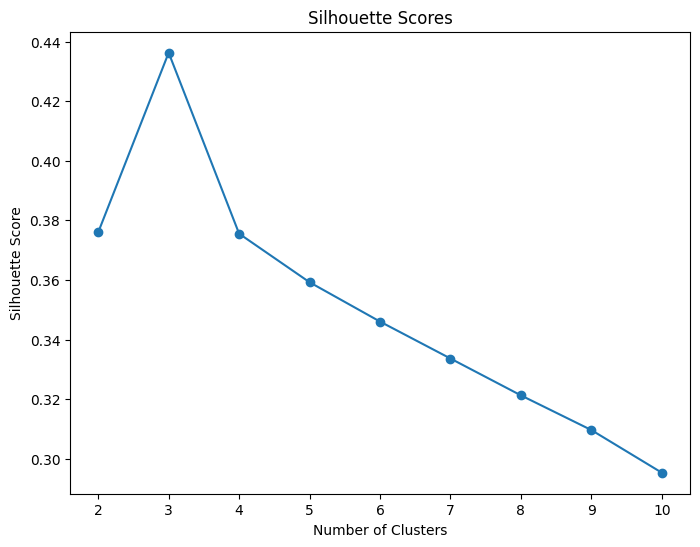

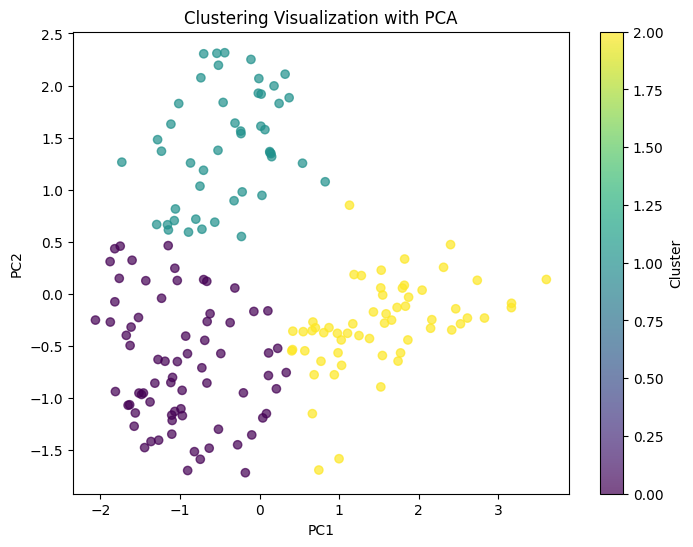

In [ ]:

# 1. 스케일링: 모든 수치형 변수에 적용
scaler = StandardScaler()
numeric_cols = ['Proline', 'Color_Intensity', 'Total_Phenols']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# 2. 데이터 분리
X = data.drop('Alcohol', axis=1)  # 특성
y = data['Alcohol']  # 타겟 변수

# 3. 클러스터링 평가 (엘보우 + 실루엣)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 엘보우 메서드
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 실루엣 점수
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 4. 최적의 클러스터 수로 모델 학습
optimal_clusters = 3  # 실루엣 점수가 최고점일 때
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 5. PCA를 통한 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
plt.title('Clustering Visualization with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
